# Air Quality Prediction

Predict air quality with various types of Regressor models
    1   Linear reg	
    2	Lasso	
    3	Ridge	
    4	Bayesian	
    5	Decesion tree	
    6	RandomForest	

## **Data Exploration**

In [1]:
import pandas as pd
df=pd.read_csv('./DataSets/city_day.csv')
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [2]:
print("No of rows:", df.shape[0])
print("No of Columns:", df.shape[1])
print("Column names:\n", df.columns)

No of rows: 29531
No of Columns: 16
Column names:
 Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')


In [3]:
df.dtypes

City           object
Date           object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Xylene        float64
AQI           float64
AQI_Bucket     object
dtype: object

In [4]:
Numerical_features = [col for col in df.columns if df[col].dtypes == 'float64']
df = df [Numerical_features]

In [5]:
#  Check for missing values
df.isnull().sum()

PM2.5       4598
PM10       11140
NO          3582
NO2         3585
NOx         4185
NH3        10328
CO          2059
SO2         3854
O3          4022
Benzene     5623
Toluene     8041
Xylene     18109
AQI         4681
dtype: int64

## Data cleaning

As we can see above there are null or missing values in the data.We cannot use this type of data with null values as it affects the performance as well as the accuracy of the model.Therefore, we will clean the data.

For data cleaning, we'll fill the null values by their column's respective mean.

In [6]:
# Replace all missing values with the respective column mean value
for col in df.columns:
    df[col].fillna(df[col].mean(),inplace=True)
    

In [7]:
#  Recheck for missing values
df.isnull().sum()

PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
Xylene     0
AQI        0
dtype: int64

There are no null values present in the data.We can proceed with next steps.

The above is the prepared data that we will use for visualization and model creation

## **Data visualization**

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

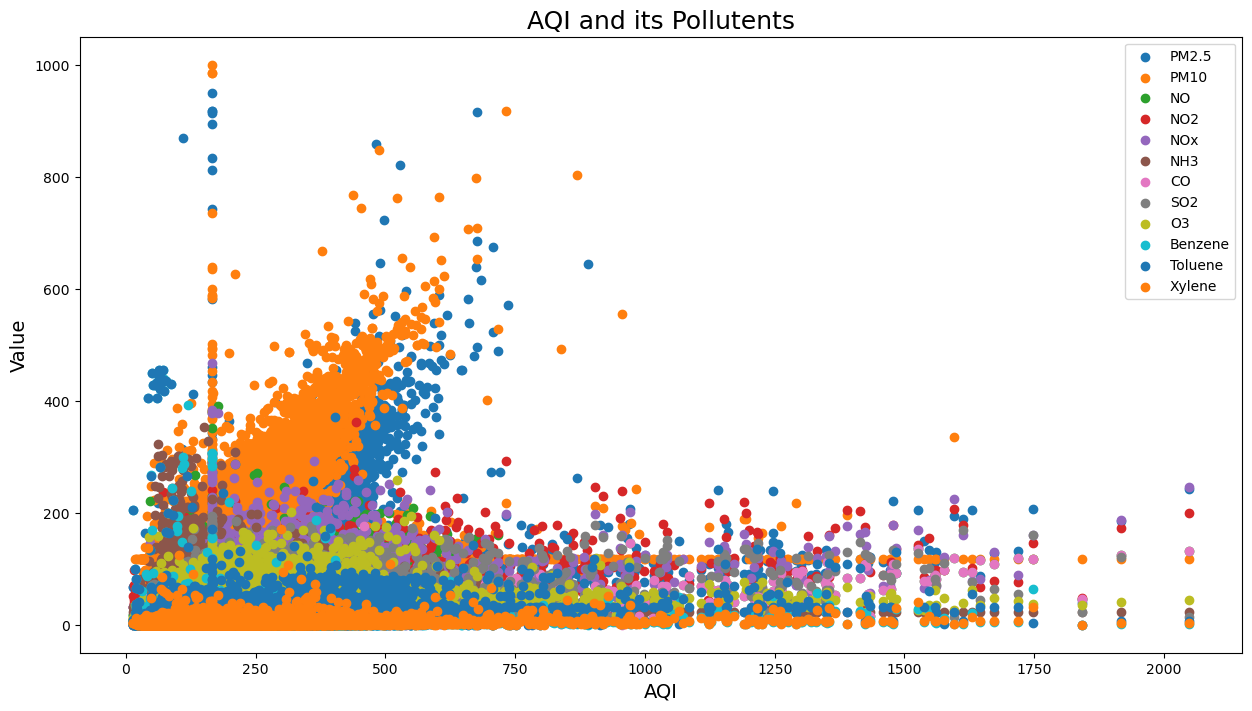

In [9]:

x = df['AQI']
plt.figure(figsize=(15,8))
for y in df.columns[:-1]:
    plt.scatter(x, df[y], label= y)
plt.title('AQI and its Pollutents',fontsize=18)
plt.xlabel('AQI',fontsize=14)
plt.ylabel('Value',fontsize=14)
plt.legend()
plt.show()    

<AxesSubplot:>

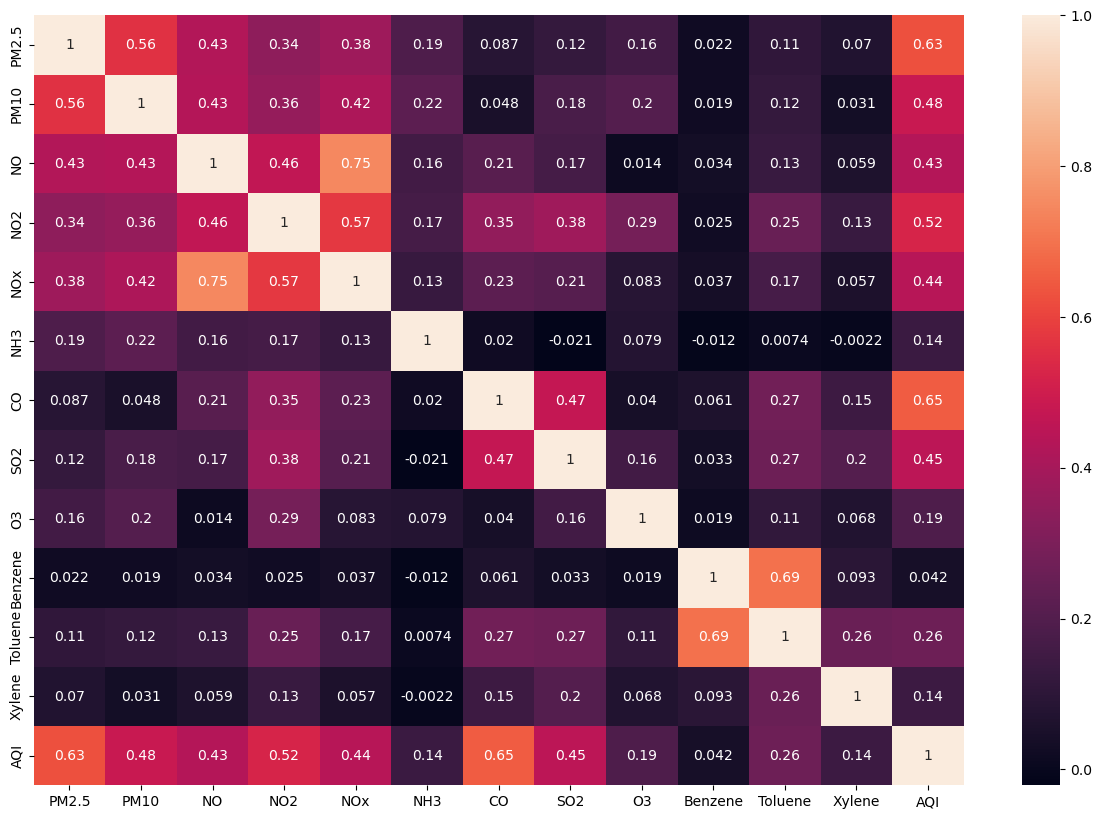

In [10]:
#to find correlation between different columns.
corr = df.corr() 
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True)

Insights :

1. AQI is least affected by NH3, O3, Benzene, Toluene, Xylene

2.AQI highly depends on 
    particle pollution (also known as particulate matter, including PM2.5 and PM10)
    NO, NO2,Nox,Co, SO2

In [11]:
selected_features = [col for col in df.columns[:-1] if df[col].corr(df['AQI'])> 0.5]
selected_features

['PM2.5', 'NO2', 'CO']

## **Data training**

In [12]:
from sklearn.model_selection import train_test_split


X = df[selected_features]  
y = df['AQI']

# Split data into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
y.shape

(29531,)

## **Model Creation**

Linear Regression

In [14]:
# Importing linear regression model

reg1 = LinearRegression()

# Fitting data into the model.
reg1.fit(X_train, y_train)

# Making predictions 
pred1 = reg1.predict(X_test)

print("Accuracy of the LinearRegression model comes to be: \n ") 
print(reg1.score(X_train, y_train))

<IPython.core.display.Javascript object>

Accuracy of the LinearRegression model comes to be: 
 
0.7682257174052722


In [15]:
# Importing model
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor

import numpy as np
from sklearn.metrics import mean_squared_error

Models = {'Linear reg': LinearRegression(),
         'Lasso': Lasso(),
         'Ridge': Ridge(),
          'Bayesian': BayesianRidge(),
         'Decesion tree': DecisionTreeRegressor(),
          'RandomForest':RandomForestRegressor(n_estimators=100, random_state=0)
          
         }

Accuracy, Rmse = [], []
for Model in Models:
    # Fitting data into the model.
    model = Models[Model]
    model.fit(X_train, y_train)
    # Making predictions 
    y_pred = model.predict(X_test)
    accuracy = round(model.score(X_test, y_test)*100,2)
    rmse     = round(np.sqrt(mean_squared_error(y_test, y_pred))*100,2)
    Accuracy.append(accuracy)
    Rmse.append(rmse)                     


In [16]:
result = pd.DataFrame({'Model': list(Models.keys()), 'rmse': Rmse, 'accuracy': Accuracy})
result

,Model,rmse,accuracy
0,Linear reg,6035.22,77.06
1,Lasso,6034.80,77.06
2,Ridge,6035.22,77.06
3,Bayesian,6035.20,77.06
4,Decesion tree,7088.95,68.34
5,RandomForest,5414.95,81.53


## **Performance Evaluation**

Conclusion:
Accuracy of Regression models- Linear regression, lasso regression and rigde regression is almost same. 

Whereas accuracy of decision tree regressor is higher thus Decision tree regressor is more efficient model.